<h3> Task 3 </h3>

We define a quantum circuit with two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.

We apply the Hadamard operator to $q_1$.

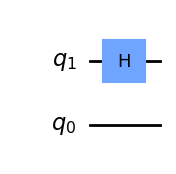

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1)
qc.draw(output='mpl',reverse_bits=True)

In [3]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3).data
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(round(entry.real,3)) + " "
    print(column)

C:\Users\jrnat\AppData\Local\Temp\ipykernel_16732\4126588496.py:3: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
C:\Users\jrnat\AppData\Local\Temp\ipykernel_16732\4126588496.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)


0.707 0.0 0.707 0.0 
0.0 0.707 0.0 0.707 
0.707 0.0 -0.707 0.0 
0.0 0.707 0.0 -0.707 


<h3> Task 5 </h3>

Create a quantum circuit with $ n=5 $ qubits.

Set each qubit to $ \ket{1} $.

Repeat 4 times:
<ul>
    <li>Randomly pick a pair of qubits, and apply cx-gate (CNOT operator) on the pair.</li>
</ul>

Draw your circuit, and execute your program 100 times.

Verify your measurement results by checking the diagram of the circuit. 

The indices are  3 2
The indices are  3 2
The indices are  0 1
The indices are  1 0


c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


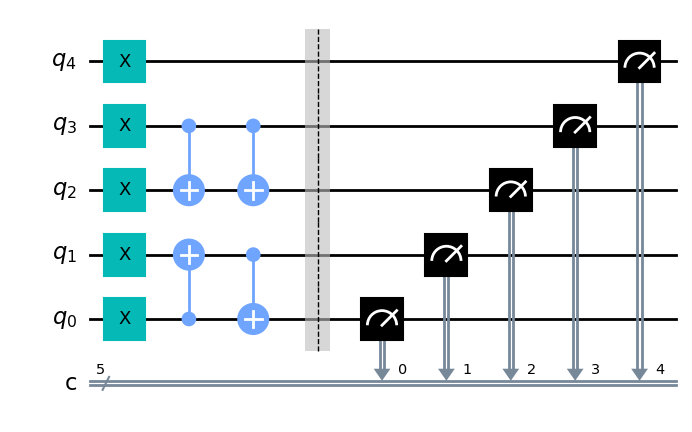

the measurument result is {'11101': 100}
our result is 11101


C:\Users\jrnat\AppData\Local\Temp\ipykernel_16732\1199703757.py:40: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)


In [4]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

#
# your code is here
n = 5
m = 4
states_of_qubits = []
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q,c)

for i in range(n):
    qc.x(q[i])
    states_of_qubits.append(1)
    
for i in range(m):
    control = randrange(m)
    target = randrange(m)
    
    while control == target:
        target = randrange(m)
        
    print("The indices are ", control, target)
    
    qc.cx(q[control], q[target])
    if states_of_qubits[control] == 1: # if the value of the controller qubit is 1,
        states_of_qubits[target] = 1 - states_of_qubits[target]
        

qc.barrier()
qc.measure(q,c)

# draw the circuit in reading order
display(qc.draw(output='mpl',reverse_bits=True))

# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print("the measurument result is",counts)

our_result=""
for state in states_of_qubits:
    our_result = str(state) + our_result
print("our result is",our_result)
    

<h3>Task 6</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.
<ul>
    <li> Apply Hadamard to the both qubits.
    <li> Apply CNOT($q_1$,$q_0$).
    <li> Apply Hadamard to the both qubits.
    <li> Measure the circuit.
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit implements CNOT($q_0$,$q_1$).

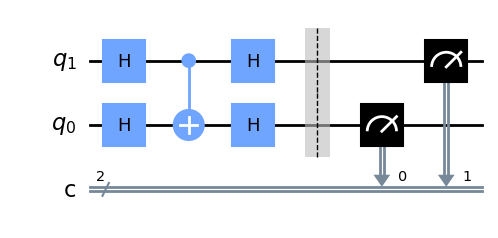

00 is mapped to {'00': 100}


C:\Users\jrnat\AppData\Local\Temp\ipykernel_16732\567241759.py:36: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)


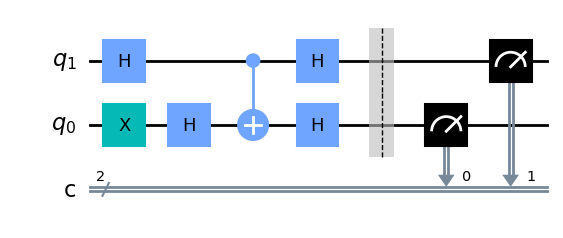

01 is mapped to {'11': 100}


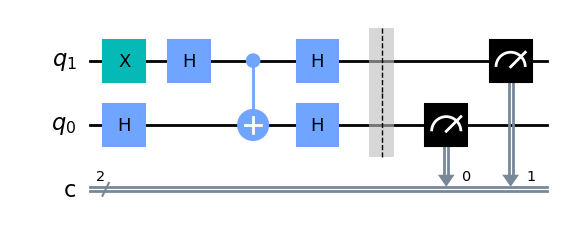

10 is mapped to {'10': 100}


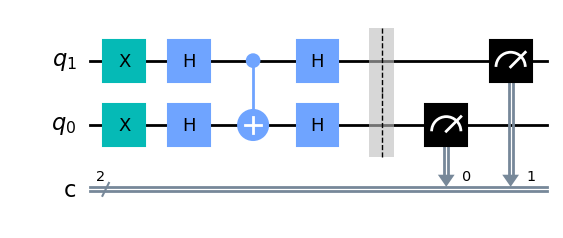

11 is mapped to {'01': 100}


In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    q =  QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
    # initialize the inputs w.r.t the reading order of Qiskit
    if input[0]=='1':
        qc.x(q[1]) # set the state of the up qubit to |1>
    if input[1]=='1':
        qc.x(q[0]) # set the state of the down qubit to |1>

    # apply h-gate to both qubits
    qc.h(q[0])
    qc.h(q[1])

    # apply cx(up-qubit,down-qubit)
    qc.cx(q[1],q[0])

    # apply h-gate to both qubits
    qc.h(q[0])
    qc.h(q[1])

    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit w.r.t the reading order of Qiskit
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # execute the circuit 100 times in the local simulator
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)

<a id="task7"></a>
<h3>Task 7</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.
<ul>
    <li> Apply CNOT($q_1$,$q_0$).
    <li> Apply CNOT($q_0$,$q_1$).
    <li> Apply CNOT($q_1$,$q_0$).
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit swaps the values of the first and second qubits:
<ul>
    <li> $\ket{00} \rightarrow \ket{00} $ </li>
    <li> $\ket{01} \rightarrow \ket{10} $ </li>
    <li> $\ket{10} \rightarrow \ket{01} $ </li>
    <li> $\ket{11} \rightarrow \ket{11} $ </li>
</ul>

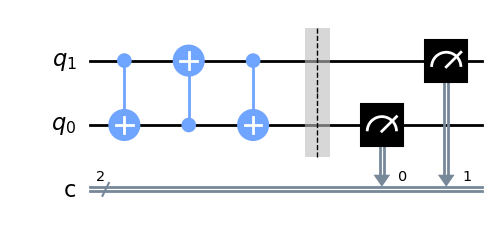

00 is mapped to {'00': 100}


C:\Users\jrnat\AppData\Local\Temp\ipykernel_16732\2881889996.py:32: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)


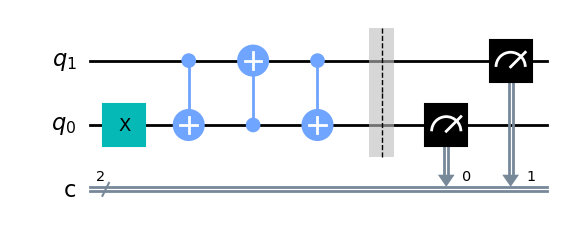

01 is mapped to {'10': 100}


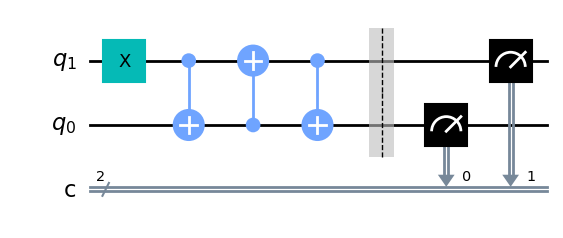

10 is mapped to {'01': 100}


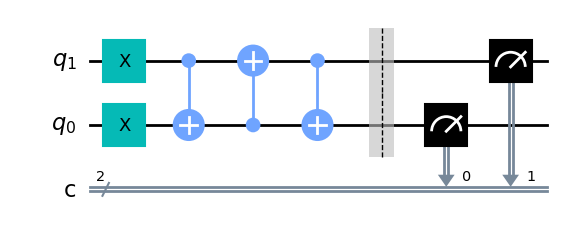

11 is mapped to {'11': 100}


In [6]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    q =  QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
    #initialize the inputs w.r.t the reading order of Qiskit
    if input[0]=='1':
        qc.x(q[1]) # set the state of the up qubit to |1>
    if input[1]=='1':
        qc.x(q[0]) # set the state of the down qubit to |1>

    # apply cx(up-qubit,down-qubit)
    qc.cx(q[1],q[0])
    # apply cx(down-qubit,up-qubit)
    qc.cx(q[0],q[1])
    # apply cx(up-qubit,down-qubit)
    qc.cx(q[1],q[0])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit w.r.t the reading order of Qiskit
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # execute the circuit 100 times in the local simulator
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)